In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.datasets import load_breast_cancer

In [2]:
data = load_breast_cancer()

In [3]:
data.data.shape

(569, 30)

In [10]:
rfc = RandomForestClassifier(random_state=1, n_estimators=100)
score = cross_val_score(rfc, data.data, data.target, cv = 10).mean()
score

0.9632745657246564

0.9650905280442486 151


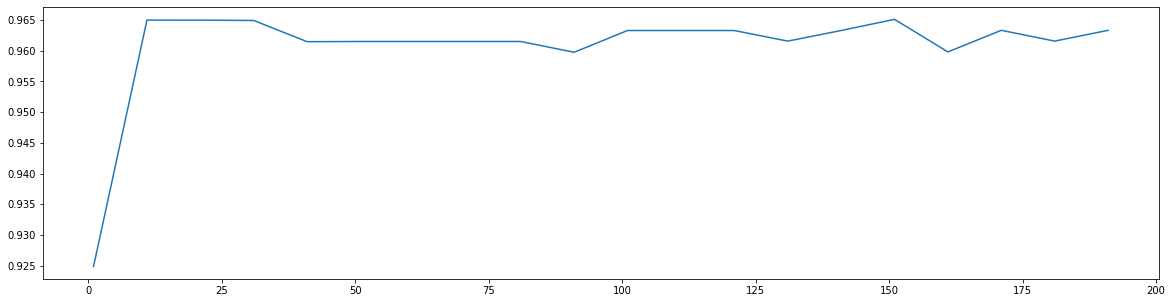

In [12]:
score_learn = []
for i in range(1, 200, 10):
    rfc =RandomForestClassifier(random_state=1, n_estimators=i)
    score = cross_val_score(rfc, data.data, data.target, cv = 10).mean()
    score_learn.append(score)
    
print(max(score_learn), score_learn.index(max(score_learn))*10 +1)

plt.figure(figsize=[20, 5])
plt.plot(range(1,200,10), score_learn)
plt.show()

0.9650905280442486 145


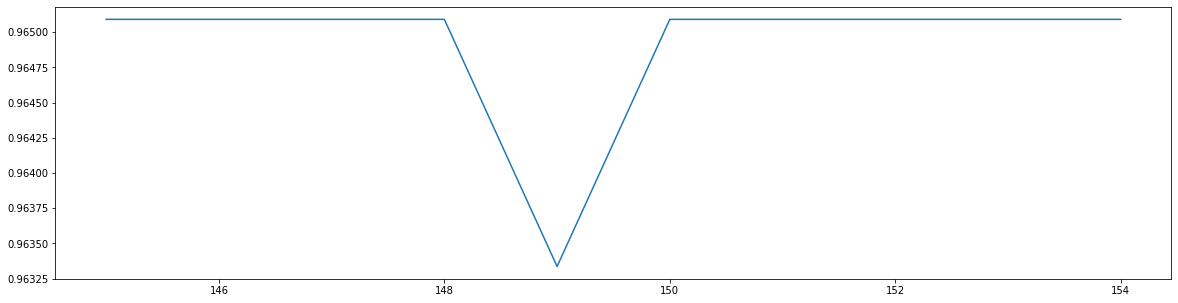

In [14]:
score_learn = []
for i in range(145, 155):
    rfc =RandomForestClassifier(random_state=1, n_estimators=i)
    score = cross_val_score(rfc, data.data, data.target, cv = 10).mean()
    score_learn.append(score)
    
print(max(score_learn), [*range(145,155)][score_learn.index(max(score_learn))])

plt.figure(figsize=[20,5])
plt.plot(range(145,155), score_learn)
plt.show()

# GridSearch

In [19]:
param_grid = {'max_depth':np.arange(1,20,1)}

In [21]:
rfc = RandomForestClassifier(random_state=1, n_estimators=145)
grid = GridSearchCV(rfc, param_grid, cv=10)
grid.fit(data.data, data.target)
print(grid.best_params_)
print(grid.best_score_)

C:\Users\Karma\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'max_depth': 8}
0.9648506151142355


In [22]:
param_grid = {'max_features':np.arange(6,30,1)}
rfc = RandomForestClassifier(random_state=1, n_estimators=145)
grid = GridSearchCV(rfc, param_grid, cv=10)
grid.fit(data.data,data.target)
print(grid.best_params_)
print(grid.best_score_)

C:\Users\Karma\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'max_features': 14}
0.9718804920913884


In [23]:
param_grid = {'criterion':['gini', 'entropy']}
rfc = RandomForestClassifier(random_state=1, n_estimators=145)
grid = GridSearchCV(rfc, param_grid, cv=10)
grid.fit(data.data,data.target)
print(grid.best_params_)
print(grid.best_score_)

C:\Users\Karma\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'criterion': 'entropy'}
0.9718804920913884


# final

In [24]:
rfc = RandomForestClassifier(random_state=1, n_estimators=145, criterion='entropy')
score = cross_val_score(rfc, data.data, data.target, cv=10).mean()
score

0.9719557514475845